In [1]:
# Importando bibliotecas essenciais para análise e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dados de exemplo
dados = {
    'Cliente': ['João', 'Maria', 'Pedro', 'Ana', 'Lucas', 'Carla', 'Felipe', 'Julia', 'Carlos', 'Laura'],
    'Tipo_Cliente': ['Novo', 'Existente', 'Novo', 'Existente', 'Novo', 'Existente', 'Novo', 'Existente', 'Novo', 'Existente'],
    'Status_Conta': ['Ativa', 'Inativa', 'Ativa', 'Ativa', 'Ativa', 'Ativa', 'Inativa', 'Ativa', 'Ativa', 'Inativa'],
    'Lucro': [1200, 0, 1500, 200, 800, 500, 0, 1000, 700, 0],
    'Perda': [0, 500, 0, 0, 100, 0, 300, 0, 0, 600],
    'Data': ['2024-01-15', '2024-02-20', '2024-03-10', '2024-04-01', '2024-05-22', '2024-06-18', '2024-07-30', '2024-08-05', '2024-09-10', '2024-10-21']
}

# Criando DataFrame e salvando como CSV
df = pd.DataFrame(dados)
df.to_csv('dados_teste.csv', index=False)
print("Arquivo CSV 'dados_teste.csv' criado com sucesso.")


Arquivo CSV 'dados_teste.csv' criado com sucesso.


In [3]:
# Carregando os dados a partir de um arquivo CSV
dados = pd.read_csv('dados_teste.csv')
print("Dimensão do conjunto de dados:", dados.shape)
print("Primeiros dados do conjunto:")
print(dados.head())


Dimensão do conjunto de dados: (10, 6)
Primeiros dados do conjunto:
  Cliente Tipo_Cliente Status_Conta  Lucro  Perda        Data
0    João         Novo        Ativa   1200      0  2024-01-15
1   Maria    Existente      Inativa      0    500  2024-02-20
2   Pedro         Novo        Ativa   1500      0  2024-03-10
3     Ana    Existente        Ativa    200      0  2024-04-01
4   Lucas         Novo        Ativa    800    100  2024-05-22


In [4]:
# Tratamento de dados nulos
dados['Lucro'].fillna(dados['Lucro'].mean(), inplace=True)
dados['Perda'].fillna(0, inplace=True)
dados['Cliente'] = dados['Cliente'].fillna('Desconhecido')

C:\Users\Vitor\AppData\Local\Temp\ipykernel_19092\23115600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Lucro'].fillna(dados['Lucro'].mean(), inplace=True)
C:\Users\Vitor\AppData\Local\Temp\ipykernel_19092\23115600.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [5]:
# Filtragem de clientes novos e contas ativas
clientes_novos = dados[dados['Tipo_Cliente'] == 'Novo']
clientes_ativos = dados[dados['Status_Conta'] == 'Ativa']

In [6]:
# Cálculo de métricas: lucro e perda total
lucro_total = dados['Lucro'].sum()
perda_total = dados['Perda'].sum()
print(f"Lucro Total: {lucro_total}, Perda Total: {perda_total}")

Lucro Total: 5900, Perda Total: 1500


In [7]:
# Identificação de clientes mais lucrativos
clientes_lucrativos = dados.groupby('Cliente')['Lucro'].sum().sort_values(ascending=False)
print("Top 5 Clientes Lucrativos:")
print(clientes_lucrativos.head())

Top 5 Clientes Lucrativos:
Cliente
Pedro     1500
João      1200
Julia     1000
Lucas      800
Carlos     700
Name: Lucro, dtype: int64


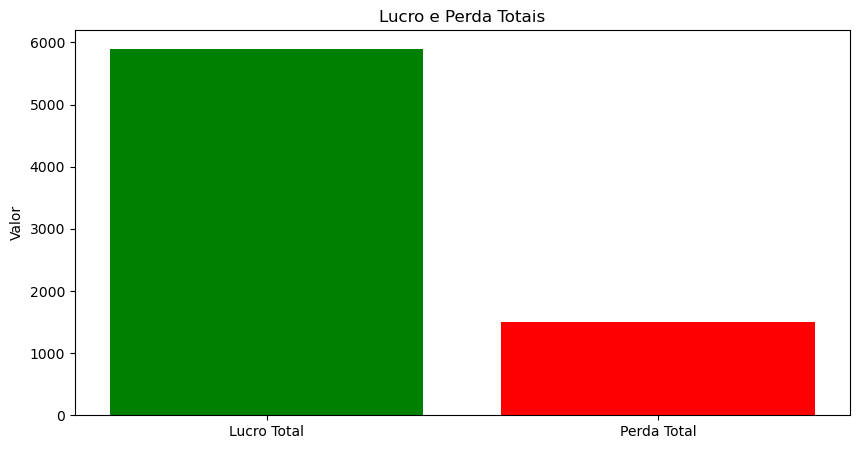

In [8]:
# Visualização: gráfico de barras - Lucro e Perda Totais
plt.figure(figsize=(10, 5))
plt.bar(['Lucro Total', 'Perda Total'], [lucro_total, perda_total], color=['green', 'red'])
plt.title('Lucro e Perda Totais')
plt.ylabel('Valor')
plt.show()

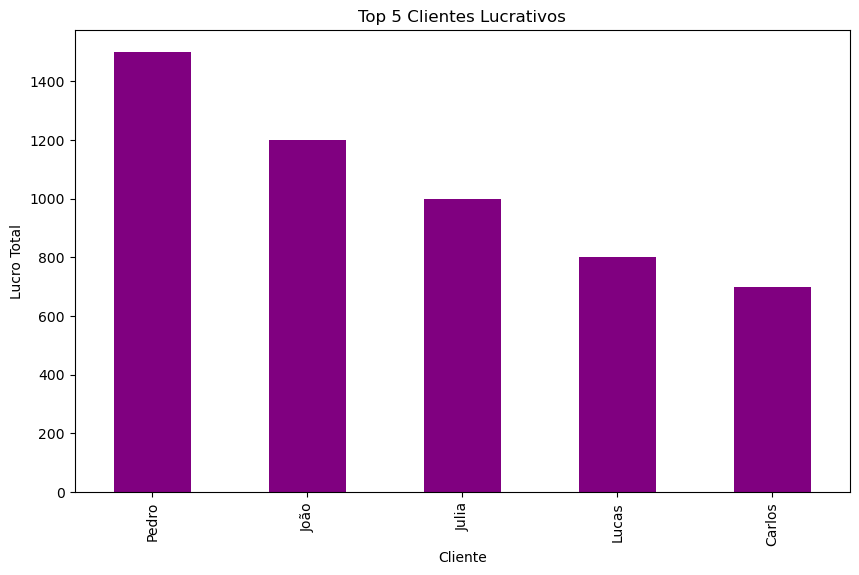

In [9]:
# Gráfico de barras para os Top 5 Clientes Lucrativos
plt.figure(figsize=(10, 6))
clientes_lucrativos.head(5).plot(kind='bar', color='purple')
plt.title('Top 5 Clientes Lucrativos')
plt.xlabel('Cliente')
plt.ylabel('Lucro Total')
plt.show()

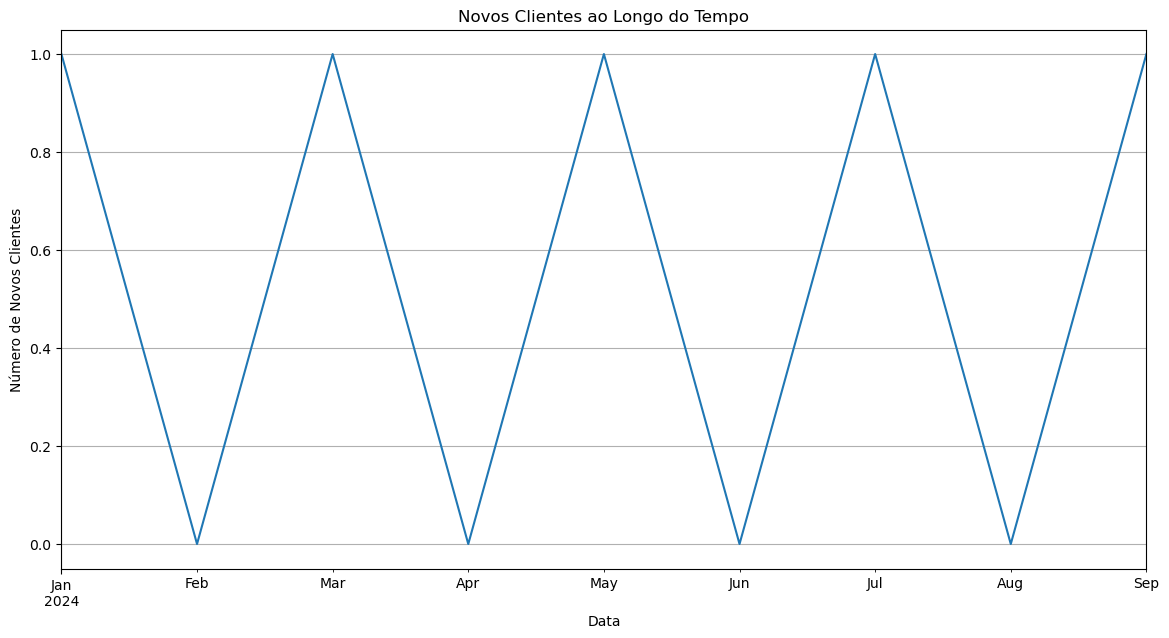

In [10]:
# Carregando os dados a partir de um arquivo CSV
dados = pd.read_csv('dados_teste.csv')
dados['Data'] = pd.to_datetime(dados['Data'])  # Converte a coluna 'Data' para o formato datetime

# Filtrando para obter apenas os clientes novos com base na coluna 'Tipo_Cliente'
clientes_novos = dados[dados['Tipo_Cliente'] == 'Novo'].copy()  # Filtra para clientes novos

# Define 'Data' como índice de 'clientes_novos'
clientes_novos.set_index('Data', inplace=True)

# Agrupamento mensal (início do mês) para contar novos clientes
novos_clientes_por_mes = clientes_novos.resample('MS').size()

# Gráfico temporal para novos clientes
plt.figure(figsize=(14, 7))
novos_clientes_por_mes.plot()
plt.title('Novos Clientes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Novos Clientes')
plt.grid(True)
plt.show()


